# Programming for Data Analysis Project
## Eimear Butler, November 2018, Semester 2

### Problem statement

For this project you must create a data set by simulating a real-world phenomenon of your choosing. 

You may pick any phenomenon you wish. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.

We suggest you use the numpy. random package for this purpose.

Specifically, in this project you should:

• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

• Investigate the types of variables involved, their likely distributions, and their relationships with each other.

• Synthesise/simulate a data set as closely matching their properties as possible.

• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Section 1

<div style="float: right">
<img style="float: right;" src="https://i.cbc.ca/1.4438426.1512698037!/cpImage/httpImage/image.jpg_gen/derivatives/16x9_780/cda-business-5-things-20170813.jpg" width="400" height="300">
</div>
**Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.**

For this project, I have chosen to simulate data regarding the sale of property in Dublin broadly based on asking prices currently advertised on Daft.ie<sup>2</sup>. The information from Daft.ie will be used as a guideline only and all data points will be simulated according to the relationships between the variables. 

**Variables Investigate the types of variables involved, their likely distributions, and their relationships with each other.**

**Synthesise/simulate a data set as closely matching their properties as possible.**

The variables I am choosing to use are as follows: 

**Distance to City**

The rendom numbers generated for this variable will need to be a float and I am determining the range will be between 1 and 10km. 

From my previous assessment in this module<sup>1</sup>, the most suitable numpy random number generator function would appear to be: 

`(b - a) * np.random.random_sample((y, x)) + a`

Let's test it out...

In [10]:
import numpy as np #import numpy functionality
import pandas as pd

a = 0.2 #Lowest value
b = 10 #Highest value 
x = 100 #Array Size x axis 
# y axis is not needed as we only want a 1 dimentional Array to feed into panda dataframe

distance = np.around((b - a) * np.random.random_sample((x)) + a, decimals = 2) 
#Requests an array of random numbers from 0.2 (but not including 0.2 itself) to 10 and round to two decimal places

#pd.Series(distance) #remove first hashtag in this row to show the output as a panda dataframe

We now have a list of distances we can use and the first column in our dataframe. 

**Property Type**

Next, I want to assign each of the 100 data points one of the following property types:

- Detached
- Semi-detached
- Terrace
- Apartment

I can see from looking at Daft.ie, in general there are more apartments and terrace houses for sale in the centre of the city than in the suburbs so I intent to have a higher probability for the assignment of those to distances within 2.5 km of the city centre. 

Below I manipulate `np.random.choice(a, b, p=[])` and an if/elif statement to generate the next array of data.

In [8]:
# First I establish the property types I want to assign
property_type = ['Detached', 'Semi-detached', 'Terrace', 'Apartment']

#At this stage, I do have the option to just generate equally random property types and associate them with a distance in a panda's dataframe using the formula below...
random_property_type = np.random.choice(property_type, 100)
f = pd.DataFrame({'Distance': distance, 'Property Type': random_property_type})

#I can also print out the number of times each property type is used and can see that they are rasonably evenly distributed between the 4 options or skew in different directions each time it is run
len1 = len(f[f['Property Type'].str.contains('Detached')])
len2 = len(f[f['Property Type'].str.contains('Semi-detached')])
len3 = len(f[f['Property Type'].str.contains('Terrace')])
len4 = len(f[f['Property Type'].str.contains('Apartment')])

print(len1, len2, len3, len4)

25 23 18 34


In [9]:
#However, as I said above, we know there are likely to be more apartments/terrace houses within 2.5km of the city centre and less outside of that so I want to reflect that in my data
#I instead split the distance figures into those within 2.5km (True) and outside of 2.5km (False)
w = distance <= 2.5

#taking my list, I now instruct numpy to not just generate a random property type for each of the 10 data points but to create preferences based on the probability weighting (p=[])

z = []    #I create an empyt set to populate with the output from the below function

for i in w:              #for all the w list which now consists of just True/False statements
    
    if i == True:        #where i is True i.e. the property is closer to the city..... 
        dist_weighted = np.random.choice(property_type, p=[0.05, 0.1, 0.25, 0.6]) #create a random number order of list where probabilty is increases for Apartments [original list: 'Detached', 'Semi-detached', 'Terrace', 'Apartment']
        z.append(dist_weighted) #add the outputed random number to the list 'z'
        
    elif i == False:     #where i is False i.e. the property is further from the city..... 
        dist_weighted = np.random.choice(property_type, p=[0.25, 0.55, 0.1, 0.1]) #here, semi detached houses will be more popular (approx. 55%).
        z.append(dist_weighted)   #add the outputed random number to the list 'z'
        
#we now have a list of property types called "dist_weighted" that is still random but will reflect a more "real life" data set due to my 
#instruction to numpy to alter the probability of one result above another based on the information in the first column (i.e. the distance)

#print(z)  #remove first hashtag in this row to show the output list  
len(z)

100

In [12]:
#let's add the property types into the data frame 
df = pd.DataFrame({'Distance': distance, 'Property Type': z, 'Within 2.5km of Centre': w})

#I can now isolate the True rows to see if there is a preference for apartments/terrace houses
df_true = df.loc[df['Within 2.5km of Centre'] == True]
df_true # looks like there is and it worked!

,Distance,Property Type,Within 2.5km of Centre
1,4.29,Apartment,True
5,6.59,Apartment,True
6,2.50,Terrace,True
8,4.28,Terrace,True
10,4.91,Apartment,True
23,0.78,Apartment,True
24,0.93,Apartment,True
27,8.77,Apartment,True
30,1.97,Terrace,True
32,9.73,Apartment,True


In [16]:
#I can also print out the number of times each property type is used to see if there is a bias for apartments/terrace houses in the city centre
len_df_true = len(df_true)
len_df_false = (len(df)-len_df_true)
len5 = len(df_true[df_true['Property Type'].str.contains('Detached')])
len6 = len(df_true[df_true['Property Type'].str.contains('Semi-detached')])
len7 = len(df_true[df_true['Property Type'].str.contains('Terrace')])
len8 = len(df_true[df_true['Property Type'].str.contains('Apartment')])

print("%d of the 100 data points are within 2.5km of the city centre. Total number of Apartments are %d and Terrace Houses are %d overall for properties within 2.5km showing a clear preference for them within this criteria." % (len_df_true, len8, len7),)

26 of the 100 data points are within 2.5km of the city centre. Total number of Apartments are 17 and Terrace Houses are 5 overall for properties within 2.5km showing a clear preference for them within this criteria.


**Condition**

Next we want to assign each of the 100 data points a rating from 1 to 10 of how good condition the property is in. In theory any of the poperties could be in very good or very bad condition and so we will use the formula `np.random.randint()` to produce random integers.

In [14]:
condition = np.random.randint(1, 11, size = 100) #generates 100 integers between 1 and 10

#let's take a look at the overall dataframe created so far before moving on

df = pd.DataFrame({'Distance': distance,'Property Type': z, 'Condition': condition})
df

,Distance,Property Type,Condition
0,8.15,Detached,8
1,4.29,Apartment,10
2,5.92,Semi-detached,9
3,9.13,Semi-detached,8
4,1.72,Semi-detached,6
5,6.59,Apartment,4
6,2.50,Terrace,7
7,9.64,Semi-detached,9
8,4.28,Terrace,3
9,8.19,Semi-detached,2


**Number of Bedrooms**

Next we want to determine how many bedrooms each property has. Again, in theory an apartment could have 4 bedrooms and a house 1 but experience tells me most properties will have either 2 or 3 bedrooms. `np.random.choice()` is therefore useful again to help us create weighted results.  

In [15]:
# First I establish the numner of bedrooms we want to include
bed = range(1,5)

#Now I can generate random bedroom numbers with a preference for 2 and 3 bedrooms 
bedrooms = np.random.choice(bed, 100, p=[0.1, 0.4, 0.4, 0.1])
#bedrooms     #remove first hashtag in this row to show the output list  

In [463]:
#Again let's add them into the overall data frame and take a look...

df = pd.DataFrame({'Distance': distance,'Property Type': z, 'Number of Bedrooms': bedrooms, 'Condition': condition})
df    

,Distance,Property Type,Number of Bedrooms,Condition
0,6.36,Detached,4,8
1,0.82,Semi-detached,1,9
2,8.48,Detached,3,3
3,0.46,Semi-detached,3,10
4,8.04,Semi-detached,3,3
5,4.15,Detached,3,3
6,4.33,Detached,3,7
7,0.99,Apartment,2,3
8,3.68,Semi-detached,3,7
9,5.33,Semi-detached,2,5


**Square Metre Price**

Finally, we want to see if we can generate a random price per square meter for each property based on the attributes we have already established. Again common sense and a quick look at Daft.ie will tell you that the following will have an effect on the overall square meter price: 
- being closer to the city = higher price
- more detatched the property = higher price
- more bedrooms = higher price
- better condition the property is in = higher price

So let's generate random numbers that account for these atributes. 

In [19]:
#First I will establish a range of prices that Numpy can use as upper and lower limits to assign a price to each atribute
#The intention is to take the average of each assigned atribute price to get an overall random generated "Square Meter Price" for each of the 100 properties 

range_1a, range_1b = 5500, 6500 #create 4 ranges of prices that will be assigned based on atributes in the next cells 
range_2a, range_2b = 4000, 5500 #prices decrease through out the range
range_3a, range_3b = 3000, 4000
range_4a, range_4b = 2500, 3000

In [20]:
d = [] #create an empty list for the distance pricing
    
for i in distance:     #using a python if statements, determines which distance values should be within which range. 
    if i < 2:          #cut off points are 2, 5, 7 and 10
        price_range = np.random.randint(range_1a, range_1b) #the numbers generated are still random yet based within the appropriate range
        d.append(price_range) #add the resulting random number to the d list until the whole distance column has been assigned a number
    elif i < 5:        #repeat
        price_range = np.random.randint(range_2a, range_2b)
        d.append(price_range)
    elif i < 7:
        price_range = np.random.randint(range_3a, range_3b)
        d.append(price_range)
    else:
        price_range = np.random.randint(range_4a, range_4b)
        d.append(price_range)
        
print(len(d)) #confirm we have generated 100 new random numbers
#print(d)  #remove hashtag here to show the newly generated list. 

100


In [21]:
p = [] #create an empty list for the property type pricing

for i in z:                    #using a python if statements, determines which property type should be within which range. 
    if i == 'Detached':        #each of the 4 types are assigned a range
        price_range = np.random.randint(range_1a, range_1b) #the numbers generated are still random yet based within the appropriate range
        p.append(price_range) #add the resulting random number to the p list until the whole property column has been assigned a number
    if i == 'Semi-detached':         #repeat
        price_range = np.random.randint(range_2a, range_2b) 
        p.append(price_range)
    if i == 'Terrace':
        price_range = np.random.randint(range_3a, range_3b) 
        p.append(price_range)
    if i == 'Apartment':
        price_range = np.random.randint(range_4a, range_4b) 
        p.append(price_range)

print(len(p))  #confirm we have generated 100 new random numbers
#print(p)  #remove hashtag here to show the newly generated list. 

100


In [22]:
b = [] #create an empty list for the bedroom pricing

for i in bedrooms:            #using a python if statements, determines which bedroom quantity should be within which range.
    if i == 4:                #each of the 4 types are assigned a range
        price_range = np.random.randint(range_1a, range_1b) #the numbers generated are still random yet based within the appropriate range
        b.append(price_range) #add the resulting random number to the b list until the whole bedroom column has been assigned a number
    if i == 3:                #repeat
        price_range = np.random.randint(range_2a, range_2b) 
        b.append(price_range)
    if i == 2:
        price_range = np.random.randint(range_3a, range_3b) 
        b.append(price_range)
    if i == 1:
        price_range = np.random.randint(range_4a, range_4b) 
        b.append(price_range)

print(len(b)) #confirm we have generated 100 new random numbers
#print(b)  #remove hashtag here to show the newly generated list. 

100


In [23]:
c = [] #create an empty list for the condition pricing

for i in condition:               #using a python if statements, determines which condition value should be within which range.
    if i in range (7, 11):        #cut off points are 7, 5, 3 and 0
        price_range = np.random.randint(range_1a, range_1b) #the numbers generated are still random yet based within the appropriate range
        c.append(price_range)     #add the resulting random number to the c list until the whole condition column has been assigned a number
    if i in range (5, 7):         #repeat
        price_range = np.random.randint(range_2a, range_2b) 
        c.append(price_range)
    if i in range (3, 5):
        price_range = np.random.randint(range_3a, range_3b) 
        c.append(price_range)
    if i in range (0, 3):
        price_range = np.random.randint(range_4a, range_4b) 
        c.append(price_range)

print(len(c)) #confirm we have generated 100 new random numbers
#print(c)  #remove hashtag here to show the newly generated list. 

100


In [24]:
#Reviewing all the pricing is easiest to do in a pandas dataframe  
df_pricing = pd.DataFrame({'Distance Pricing': d,'Property Type Pricing': p, 'Bedroom Pricing': b, 'Condition Pricing': c})

#here we can also get the mean of each row of prices to generate an overall average price which we will also use as the Square Meter Price
square_m = df_pricing.mean(axis=1) #source: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.mean.html
df_pricing = pd.DataFrame({'Distance Pricing': d,'Property Type Pricing': p, 'Bedroom Pricing': b, 'Condition Pricing': c, 'Mean Price': square_m})
df_pricing

,Distance Pricing,Property Type Pricing,Bedroom Pricing,Condition Pricing,Mean Price
0,2718,5512,2623,5992,4211.25
1,4908,2571,4551,5564,4398.50
2,3409,4430,3183,6497,4379.75
3,2730,4881,3997,5502,4277.50
4,5935,4917,2683,4842,4594.25
5,3816,2710,6391,3762,4169.75
6,5224,3429,3382,6182,4554.25
7,2564,4000,2966,5851,3845.25
8,4194,3685,5436,3331,4161.50
9,2653,5414,2775,2665,3376.75


In [97]:
#adding the Square Meter Price to the overall generated dataframe, results in the following: 
df_final = pd.DataFrame({'Distance': distance,'Property Type': z, 'Number of Bedrooms': bedrooms, 'Condition': condition, 'Square Metre Price': square_m})
df_final

,Distance,Property Type,Number of Bedrooms,Condition,Square Metre Price
0,8.15,Detached,1,8,4211.25
1,4.29,Apartment,3,10,4398.50
2,5.92,Semi-detached,2,9,4379.75
3,9.13,Semi-detached,2,8,4277.50
4,1.72,Semi-detached,1,6,4594.25
5,6.59,Apartment,4,4,4169.75
6,2.50,Terrace,2,7,4554.25
7,9.64,Semi-detached,1,9,3845.25
8,4.28,Terrace,3,3,4161.50
9,8.19,Semi-detached,1,2,3376.75


## Plotting Graphs - Visual Analysis 

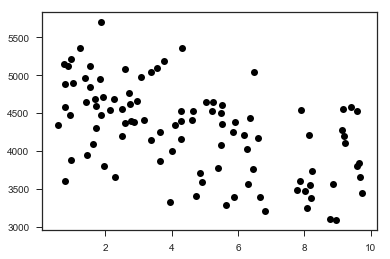

In [62]:
#you could also pick out certian aspects to examine using matplotlib
import matplotlib as mat
import matplotlib.pyplot as plt # Import matplotlib functionality

# Draw some axes. #Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 
#plt.plot([-1, 10], [0, 0], 'k-')
#plt.plot([0, 0], [-1, 10], 'k-')

# Plot the red, blue and green lines.
#plt.plot([1, 1], [-1, 3], 'b:')
#plt.plot([-1, 1], [3, 3], 'r:')

# Plot the two points (1,3) and (2,5).
plt.plot([distance], [square_m], 'ko', label="Property Type")
# Join them with an (extending) green lines.
#plt.plot([-1, 10], [-1, 21], 'g-')

# Set some reasonable plot limits.
#plt.xlim([-1, 10])
#plt.ylim([-1, 10])

# Show the plot.
plt.show()

In [32]:
(m1,c1) = np.polyfit(distance,square_m,1) #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial

#where the resuting m and c are values in the equation of a straight line (y=mx+c)

print(m1,c1) 

-111.91940346252203 4790.013084596587


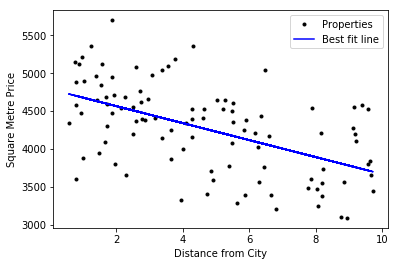

In [34]:
plt.plot(distance, square_m, 'k.', label='Properties')
plt.plot(distance, m1 * distance + c1, 'b-', label='Best fit line')

plt.xlabel('Distance from City') #set name for x axis
plt.ylabel('Square Metre Price') #set name for y axis

plt.legend() # add a legend
plt.show() #show the plot inline 

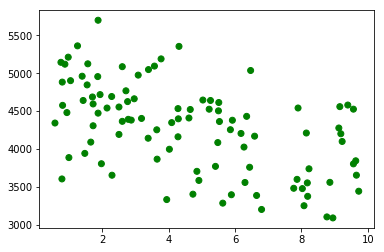

In [49]:
#colors = ['red','green','blue','purple']
#label = ['Distance','Property Type', 'Number of Bedrooms', 'Condition', 'Square Metre Price']
#plt.scatter(distance, square_m, c=label, cmap=mat.colors.ListedColormap(colors))

labl = [0, 1, 1, 0, 0]
color= ['red' if 'Property Type' == 'Terrace' else 'green' for l in labl]
plt.scatter(distance, square_m, color=color)



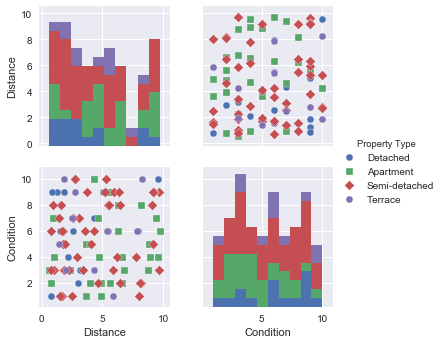

In [76]:
#In theory, if you could import the live data from Daft.ie, you could easily create graphs like the ones below to see which properties meet your initial criteria, e.g. are in reasonably good condition and near the city 

import seaborn as sns
sns.pairplot(df, hue='Property Type', markers=["o", "s", "D", "o",])

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")


sns.relplot(x=distance, y=square_m, col=z, hue='Property Type', style=condition, size=bedrooms, data=df_final);


AttributeError: module 'seaborn' has no attribute 'relplot'

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


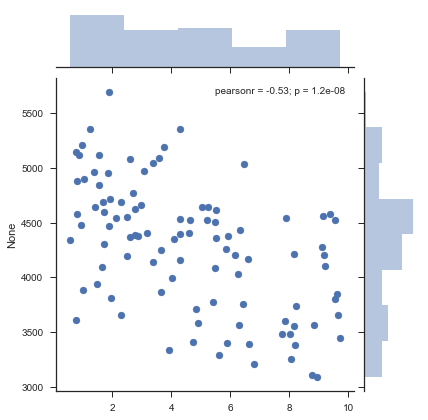

In [104]:
import seaborn as sns

sns.jointplot(x=distance, y=square_m, data=df);

In [111]:
sns.__version__

'0.8.1'

In [108]:
sns.FacetGrid(df_final, row=distance, col=z
g.map(sns.distplot, condition)


SyntaxError: invalid syntax (<ipython-input-108-cc0624a336c0>, line 2)

In [107]:
sns.heatmap(df_final, annot=True)
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Machine Learning

In [ ]:
If this 

## Conclusion

In conclusion, using a combination of the `numpy.random` function and if/elif statements, I was able to generate data that is reasonably reflective of realy life and based on the general assumptions anyone can make when reviewing askign prices on Daft.ie.  

## References

1. https://github.com/eimearbutler7/Programming4DA/blob/master/P4DA_Assignment.ipynb
2. Daft.ie examples
  - https://www.daft.ie/dublin/houses-for-sale/beaumont/5-coolatree-close-beaumont-dublin-1931390/
  - https://www.daft.ie/dublin/apartments-for-sale/ifsc/1-semple-house-custom-house-square-ifsc-dublin-1975329/
  - https://www.daft.ie/dublin/houses-for-sale/whitehall/275-collins-avenue-whitehall-dublin-1960290/